In [ ]:
!pip install roboflow


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="KK0QwnS97XhoIsa90d2d")
project = rf.workspace("ai-model-2xkcd").project("convenience-store-z6osk")
version = project.version(9)
dataset = version.download("yolov8")







   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 83.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 127.7 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Convenience-store--9 in yolov8:: 100%|██████████| 1322/1322 [00:00<00:00, 5850.46it/s]


In [ ]:
# Cài ultralytics (YOLOv8)
!pip install ultralytics --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 66.5 MB/s eta 0:00:00


In [ ]:
print(dataset.location)

/content/Convenience-store--4


In [ ]:
import os

root_dir = "/content/Convenience-store--4"

# In cấu trúc thư mục
for root, dirs, files in os.walk(root_dir):
    level = root.replace(root_dir, '').count(os.sep)
    indent = ' ' * 4 * level
    print(f"{indent}{os.path.basename(root)}/")
    subindent = ' ' * 4 * (level + 1)
    for f in files:
        print(f"{subindent}{f}")

# Tìm tất cả file .yaml hoặc .yml
yaml_files = []
for root, dirs, files in os.walk(root_dir):
    for f in files:
        if f.endswith((".yaml", ".yml")):
            yaml_files.append(os.path.join(root, f))

print("\n📄 YAML files found:")
for path in yaml_files:
    print(path)


In [ ]:
import os

dataset_path = "/content/Convenience-store--4"

print(f"📂 Dataset structure under: {dataset_path}\n")

for root, dirs, files in os.walk(dataset_path):
    level = root.replace(dataset_path, '').count(os.sep)
    indent = ' ' * 4 * level
    print(f"{indent}{os.path.basename(root)}/")
    subindent = ' ' * 4 * (level + 1)
    for f in files:
        if f.endswith(('.jpg', '.jpeg', '.png', '.txt', '.yaml', '.yml')):
            print(f"{subindent}{f}")


In [ ]:
import os
from ultralytics import YOLO

dataset_path = "/content/Convenience-store--9"
data_yaml_path = os.path.join(dataset_path, "data.yaml")

model = YOLO("yolov8s.pt")

model.train(
    data=data_yaml_path,
    imgsz=512,
    epochs=70,
    batch=16,
    device=0,

    optimizer='AdamW',
    lr0=0.0008,
    lrf=0.01,
    weight_decay=0.0004,

    mosaic=0.3,
    mixup=0.0,
    copy_paste=0.1, # chống nhận nhầm hình trên bao bì
    scale=0.10,
    hsv_h=0.01,
    hsv_s=0.2,
    hsv_v=0.2,

    close_mosaic=20,

    amp=True,
    pretrained=True,

    project="yolov8_hh_best",
    name="HaoHao_v3",
)


Ultralytics 8.3.229 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=20, cls=0.5, compile=False, conf=None, copy_paste=0.1, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Convenience-store--9/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=70, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.01, hsv_s=0.2, hsv_v=0.2, imgsz=512, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.0008, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=0.3, multi_scale=False, name=HaoHao_v33, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True, patience=100, perspective=0.0, plo

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c58a71a7020>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
     

In [ ]:
!ls /content/yolov8_hh_best/HaoHao_v33

args.yaml			 labels.jpg	      train_batch1.jpg
BoxF1_curve.png			 results.csv	      train_batch2.jpg
BoxP_curve.png			 results.png	      val_batch0_labels.jpg
BoxPR_curve.png			 train_batch0.jpg     val_batch0_pred.jpg
BoxR_curve.png			 train_batch1800.jpg  val_batch1_labels.jpg
confusion_matrix_normalized.png  train_batch1801.jpg  val_batch1_pred.jpg
confusion_matrix.png		 train_batch1802.jpg  weights


📌 Showing: confusion_matrix.png


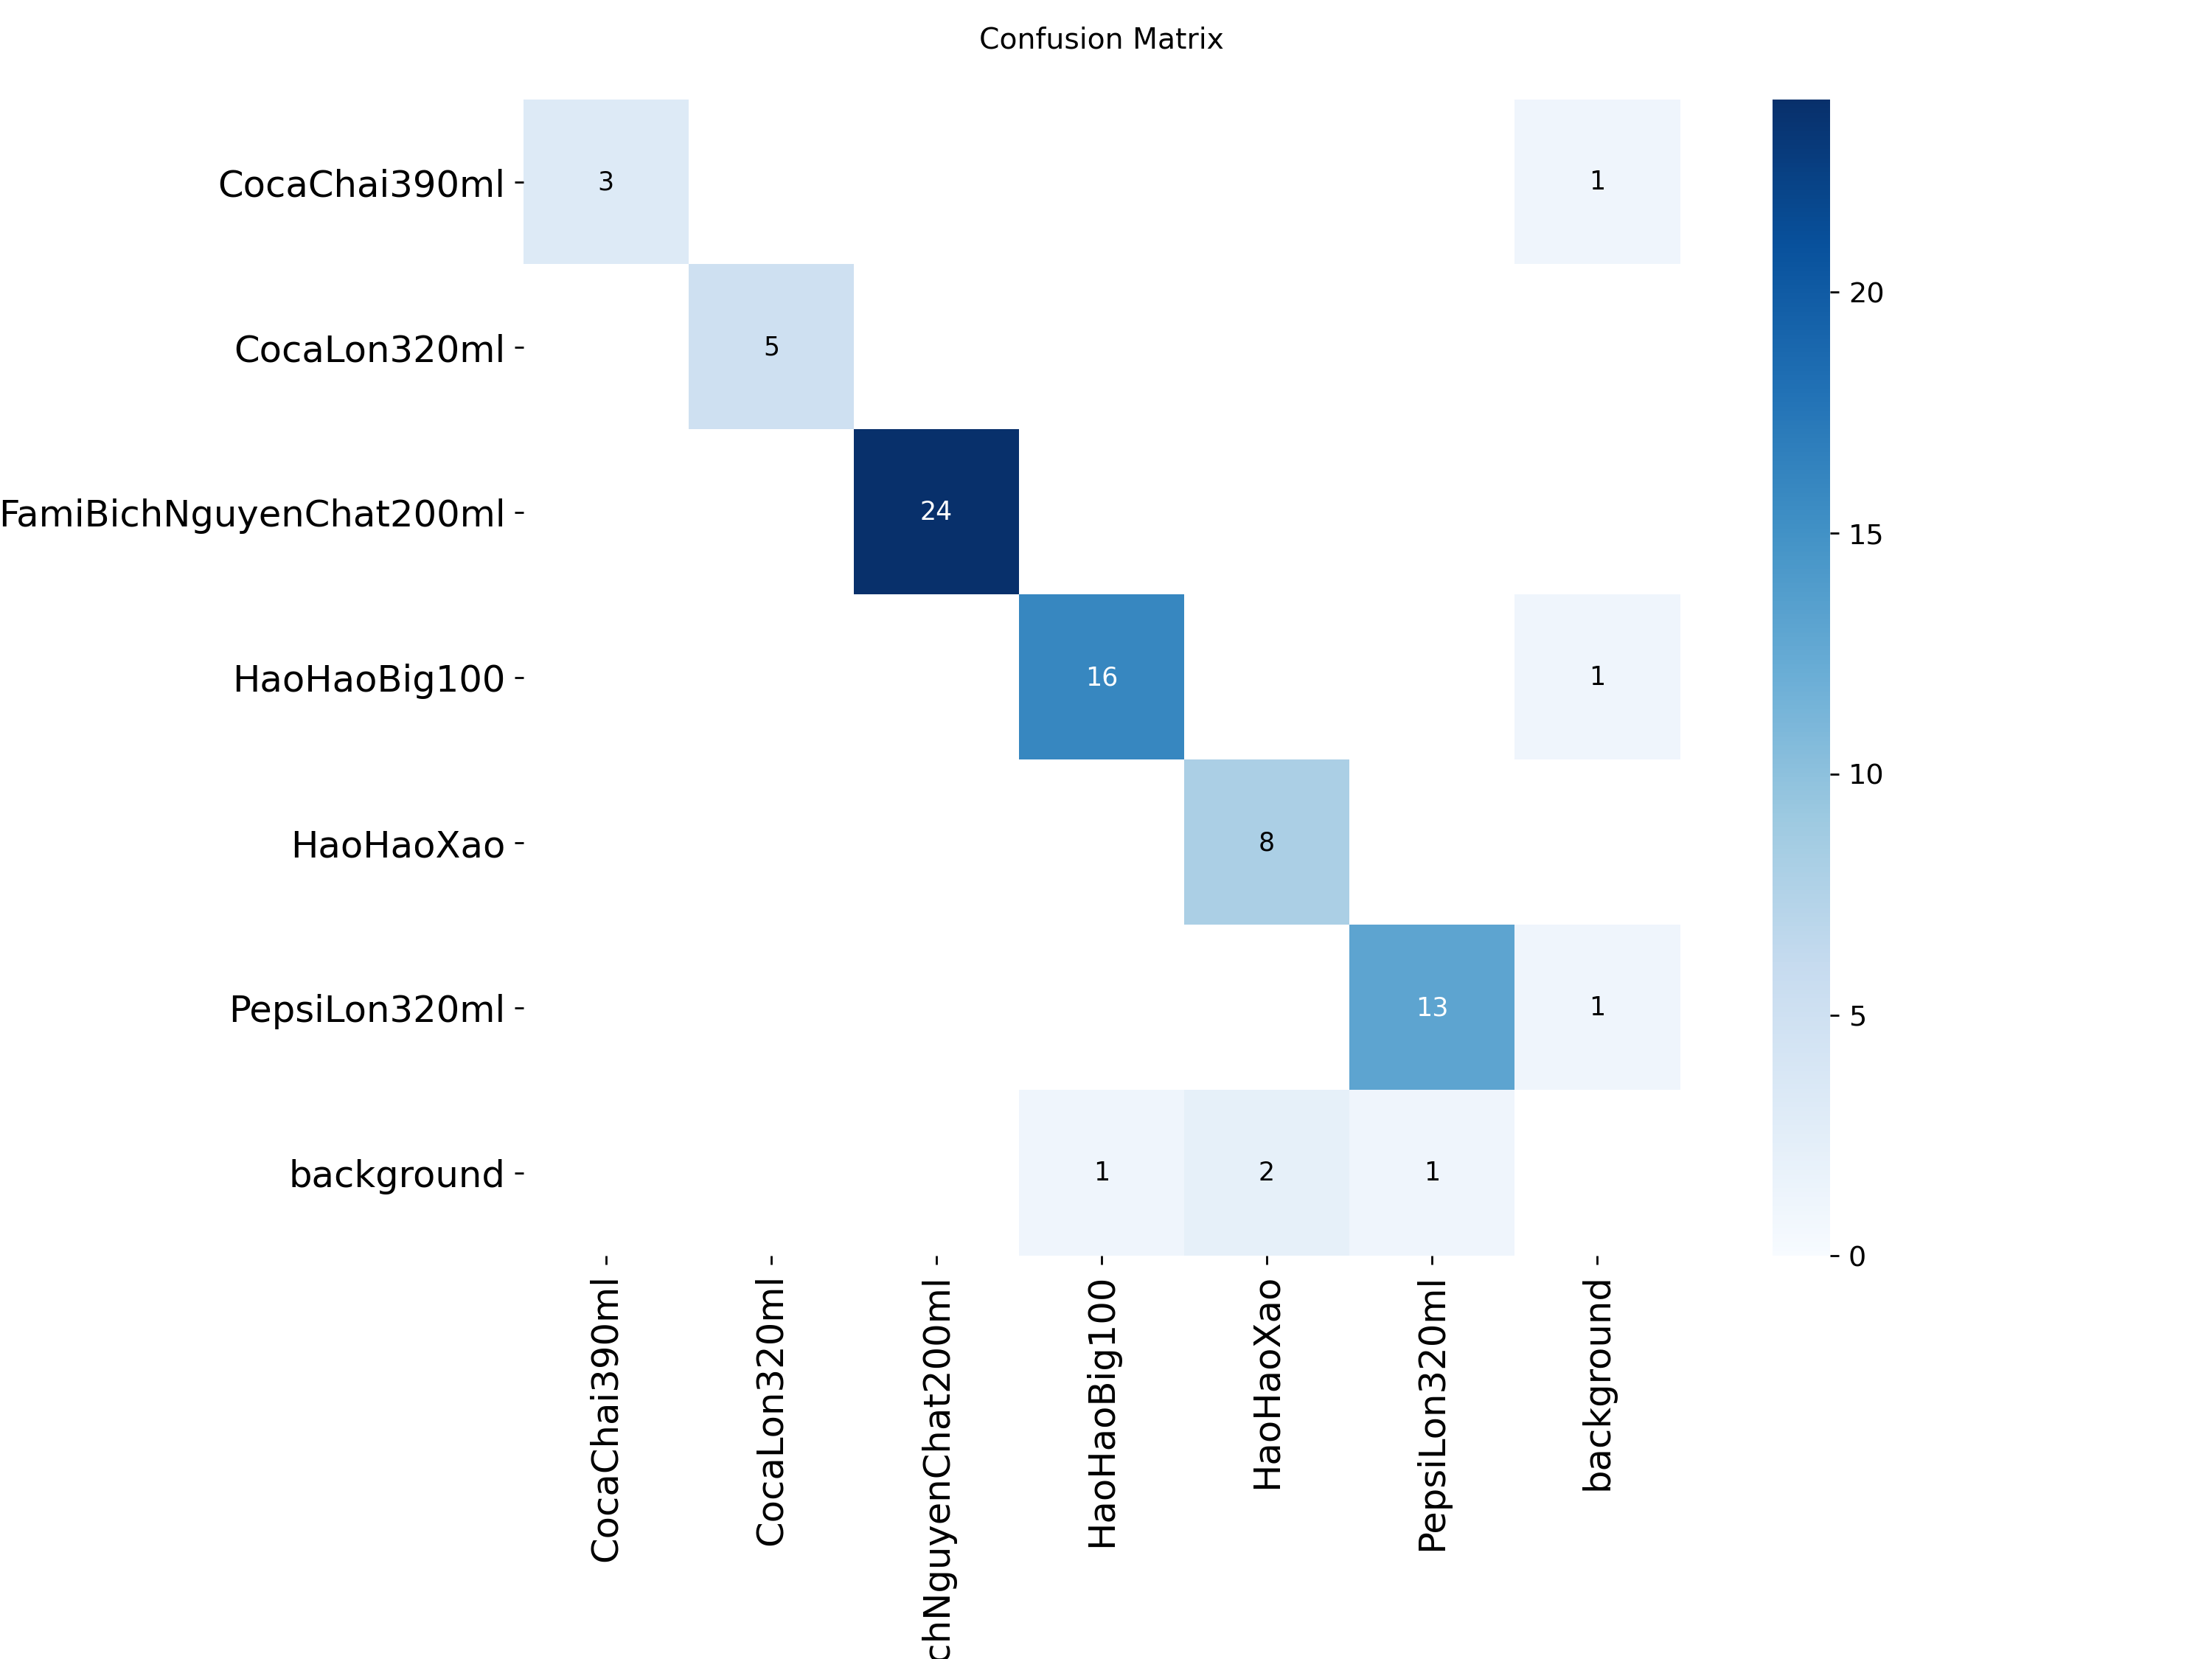

📌 Showing: confusion_matrix_normalized.png


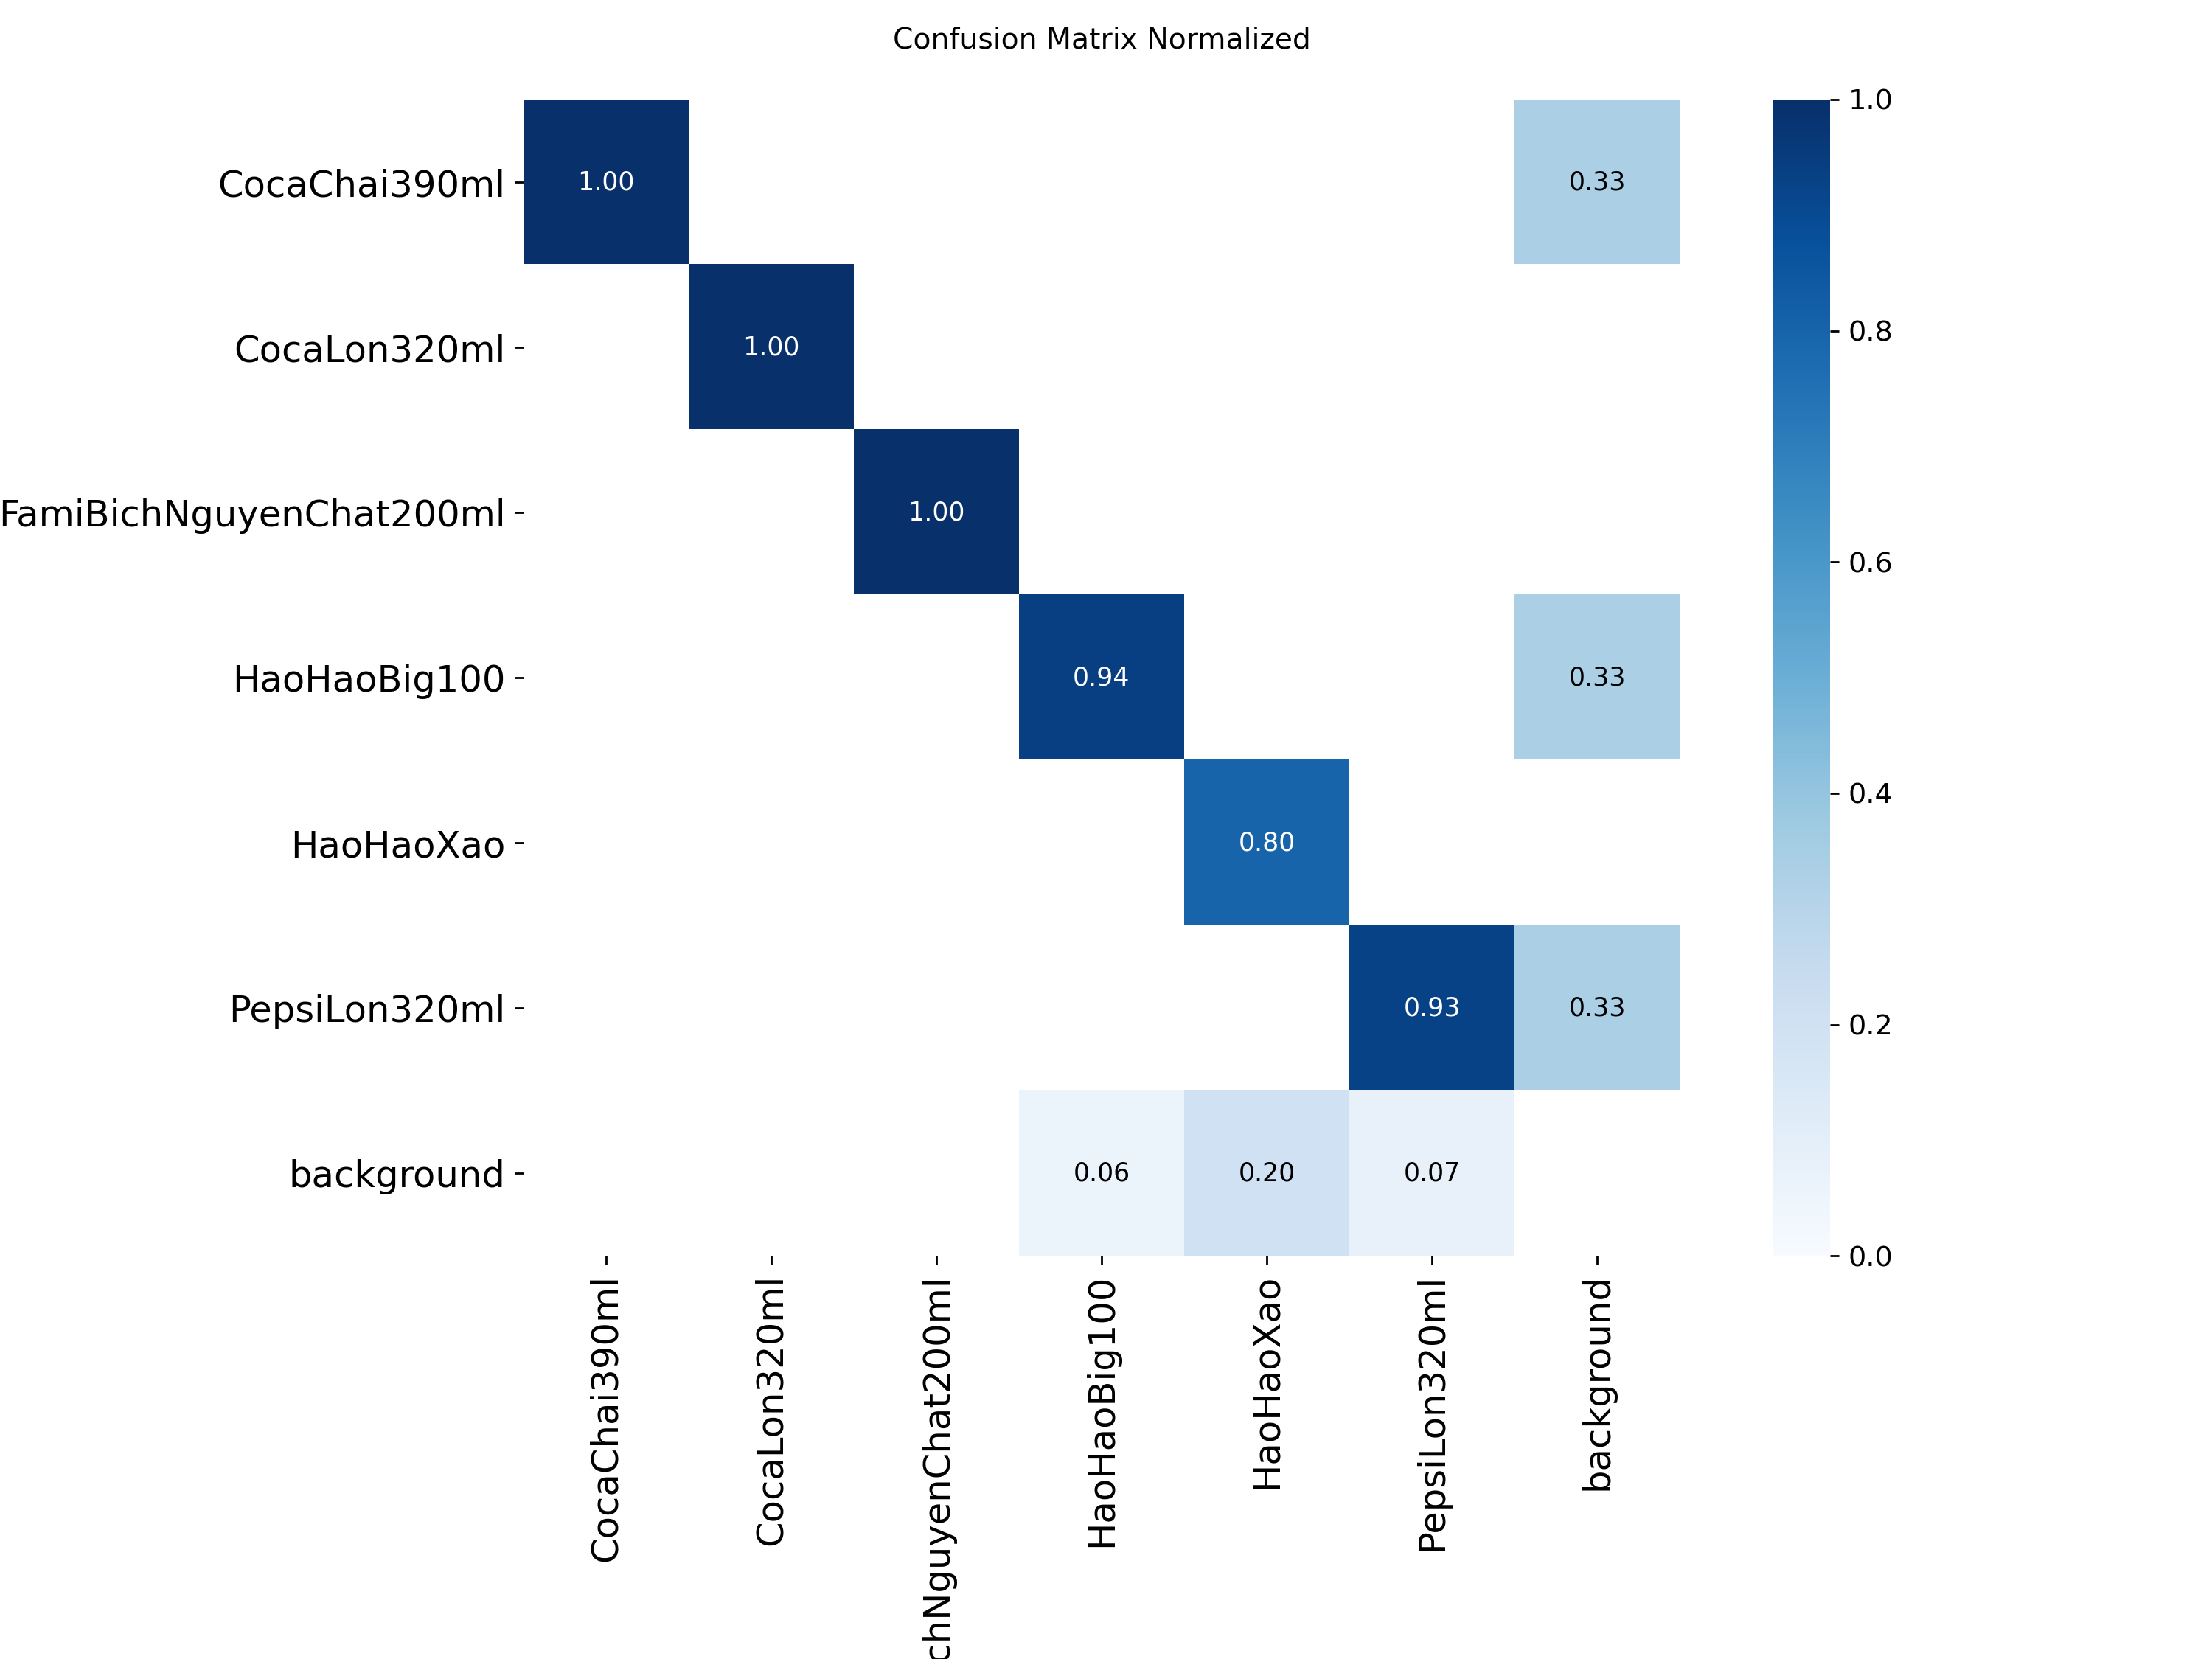

📌 Showing: val_batch0_labels.jpg


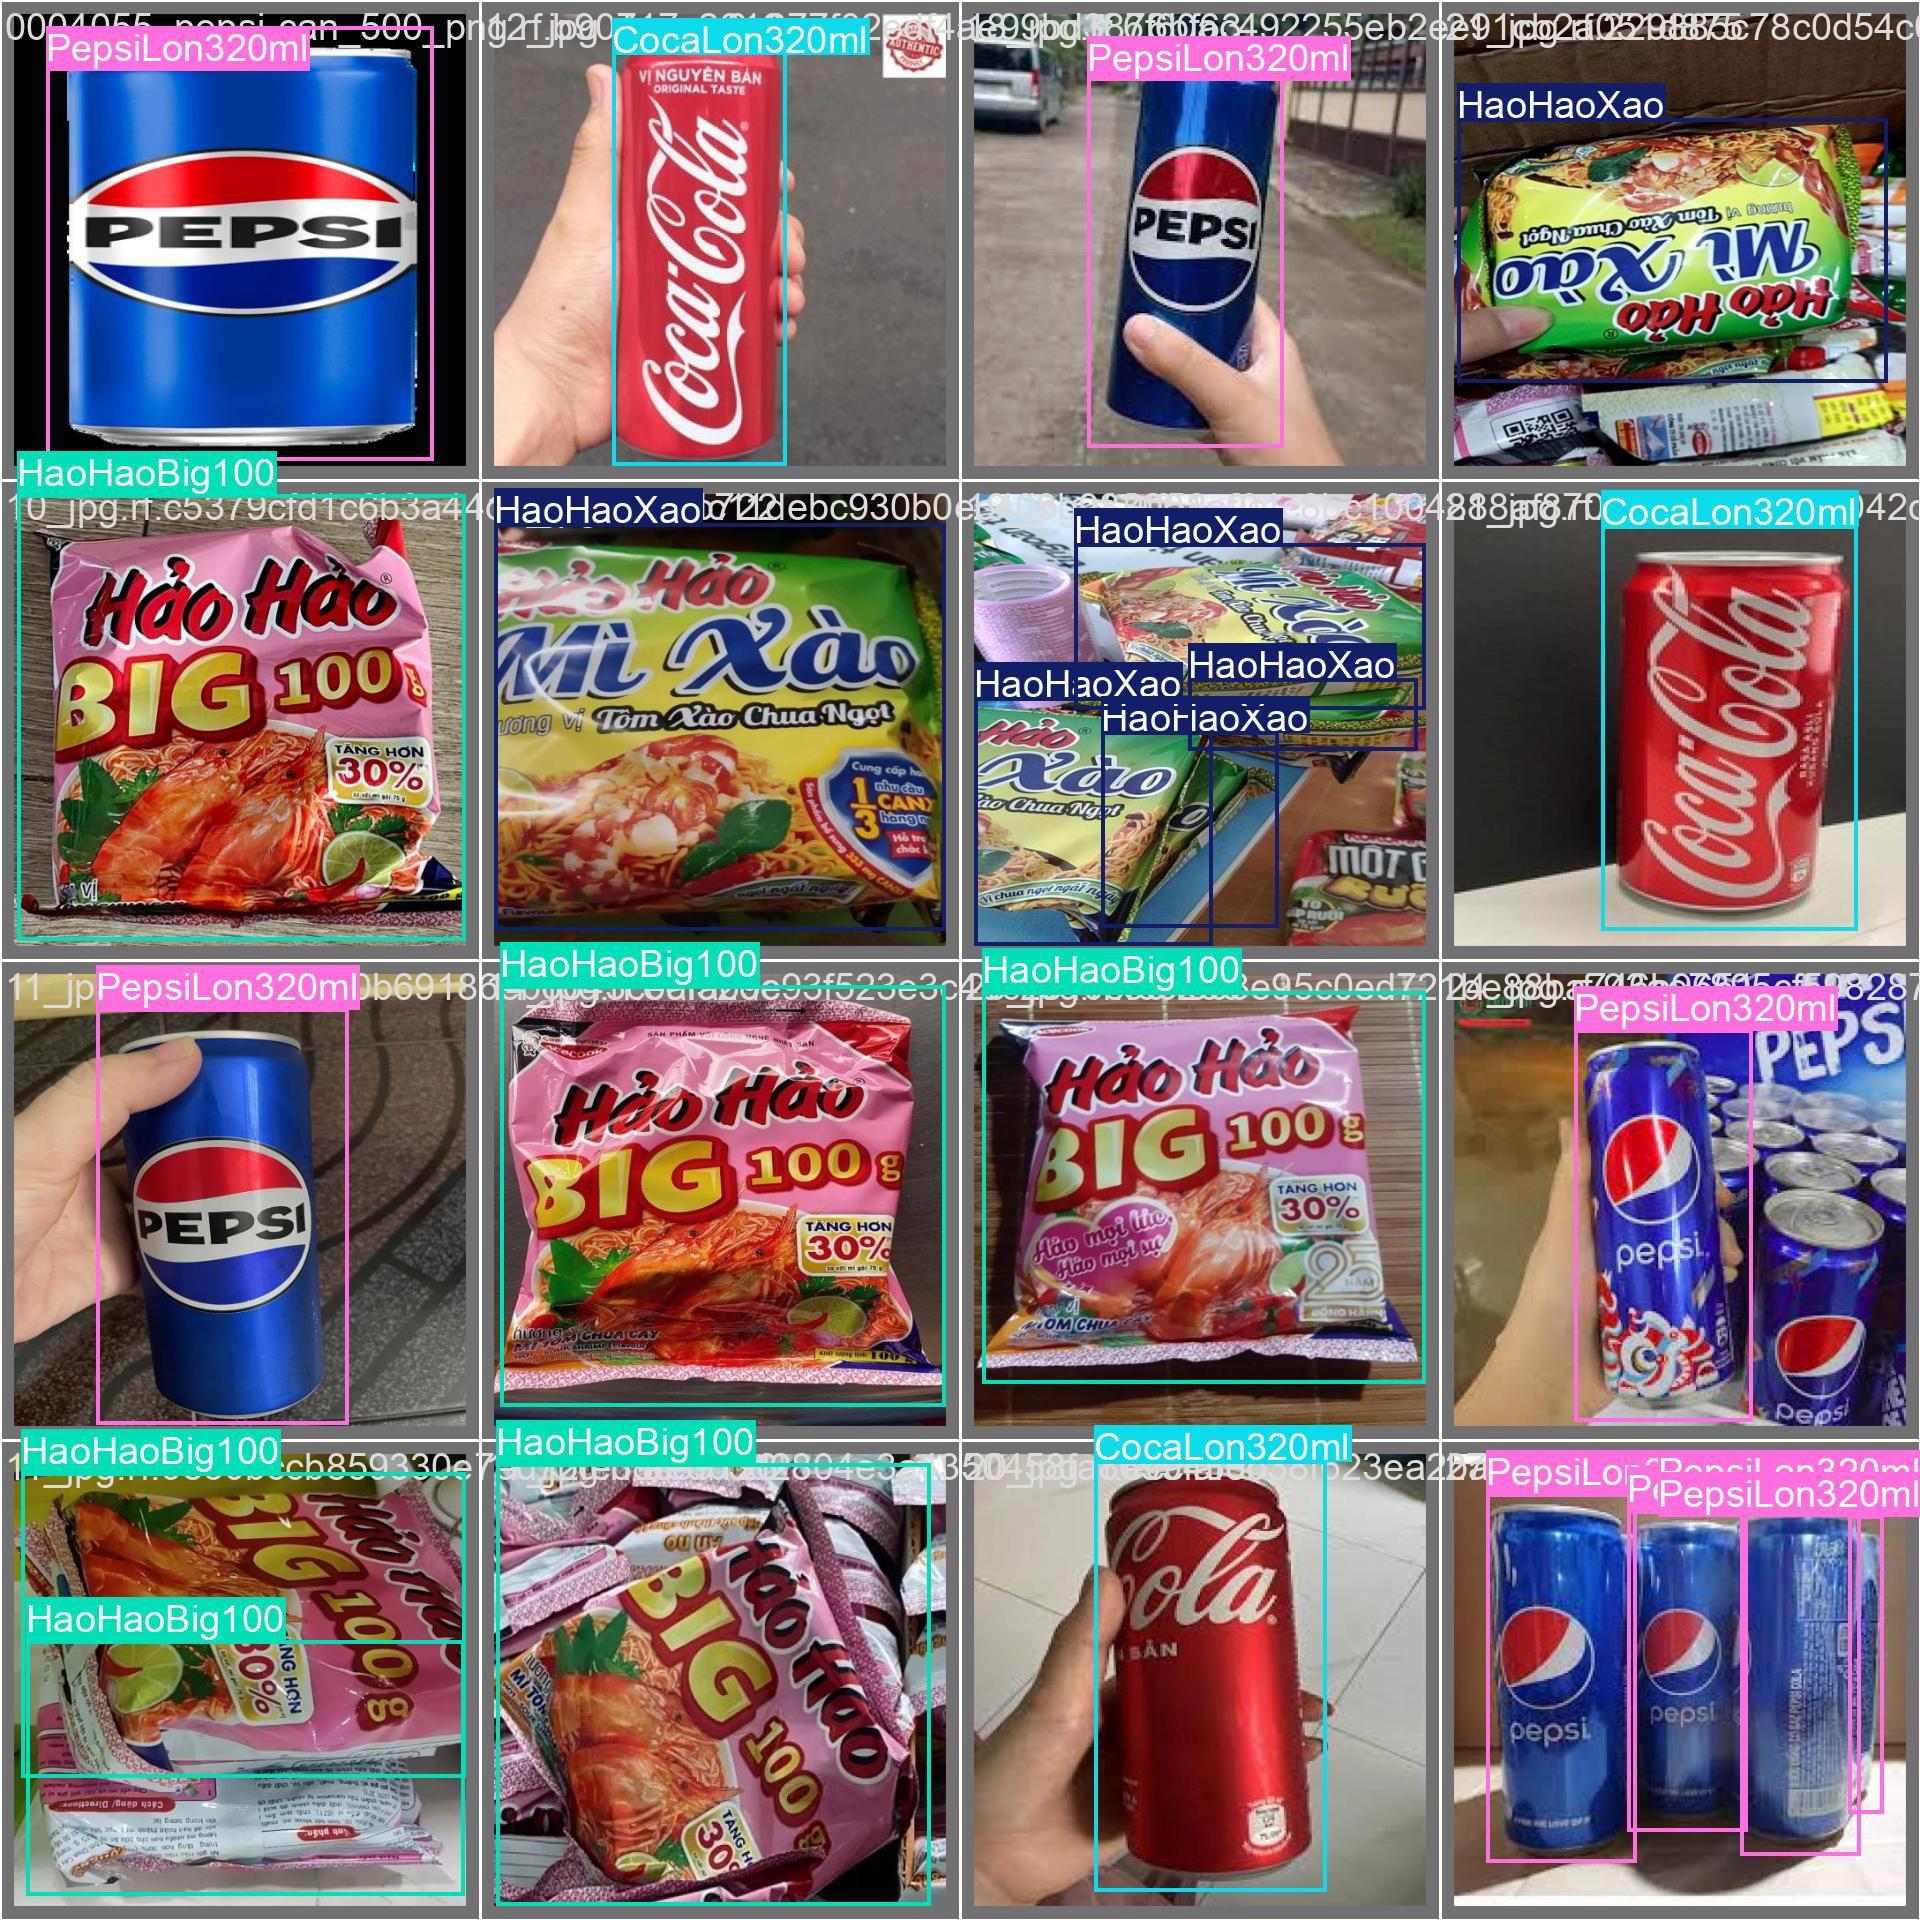

📌 Showing: val_batch0_pred.jpg


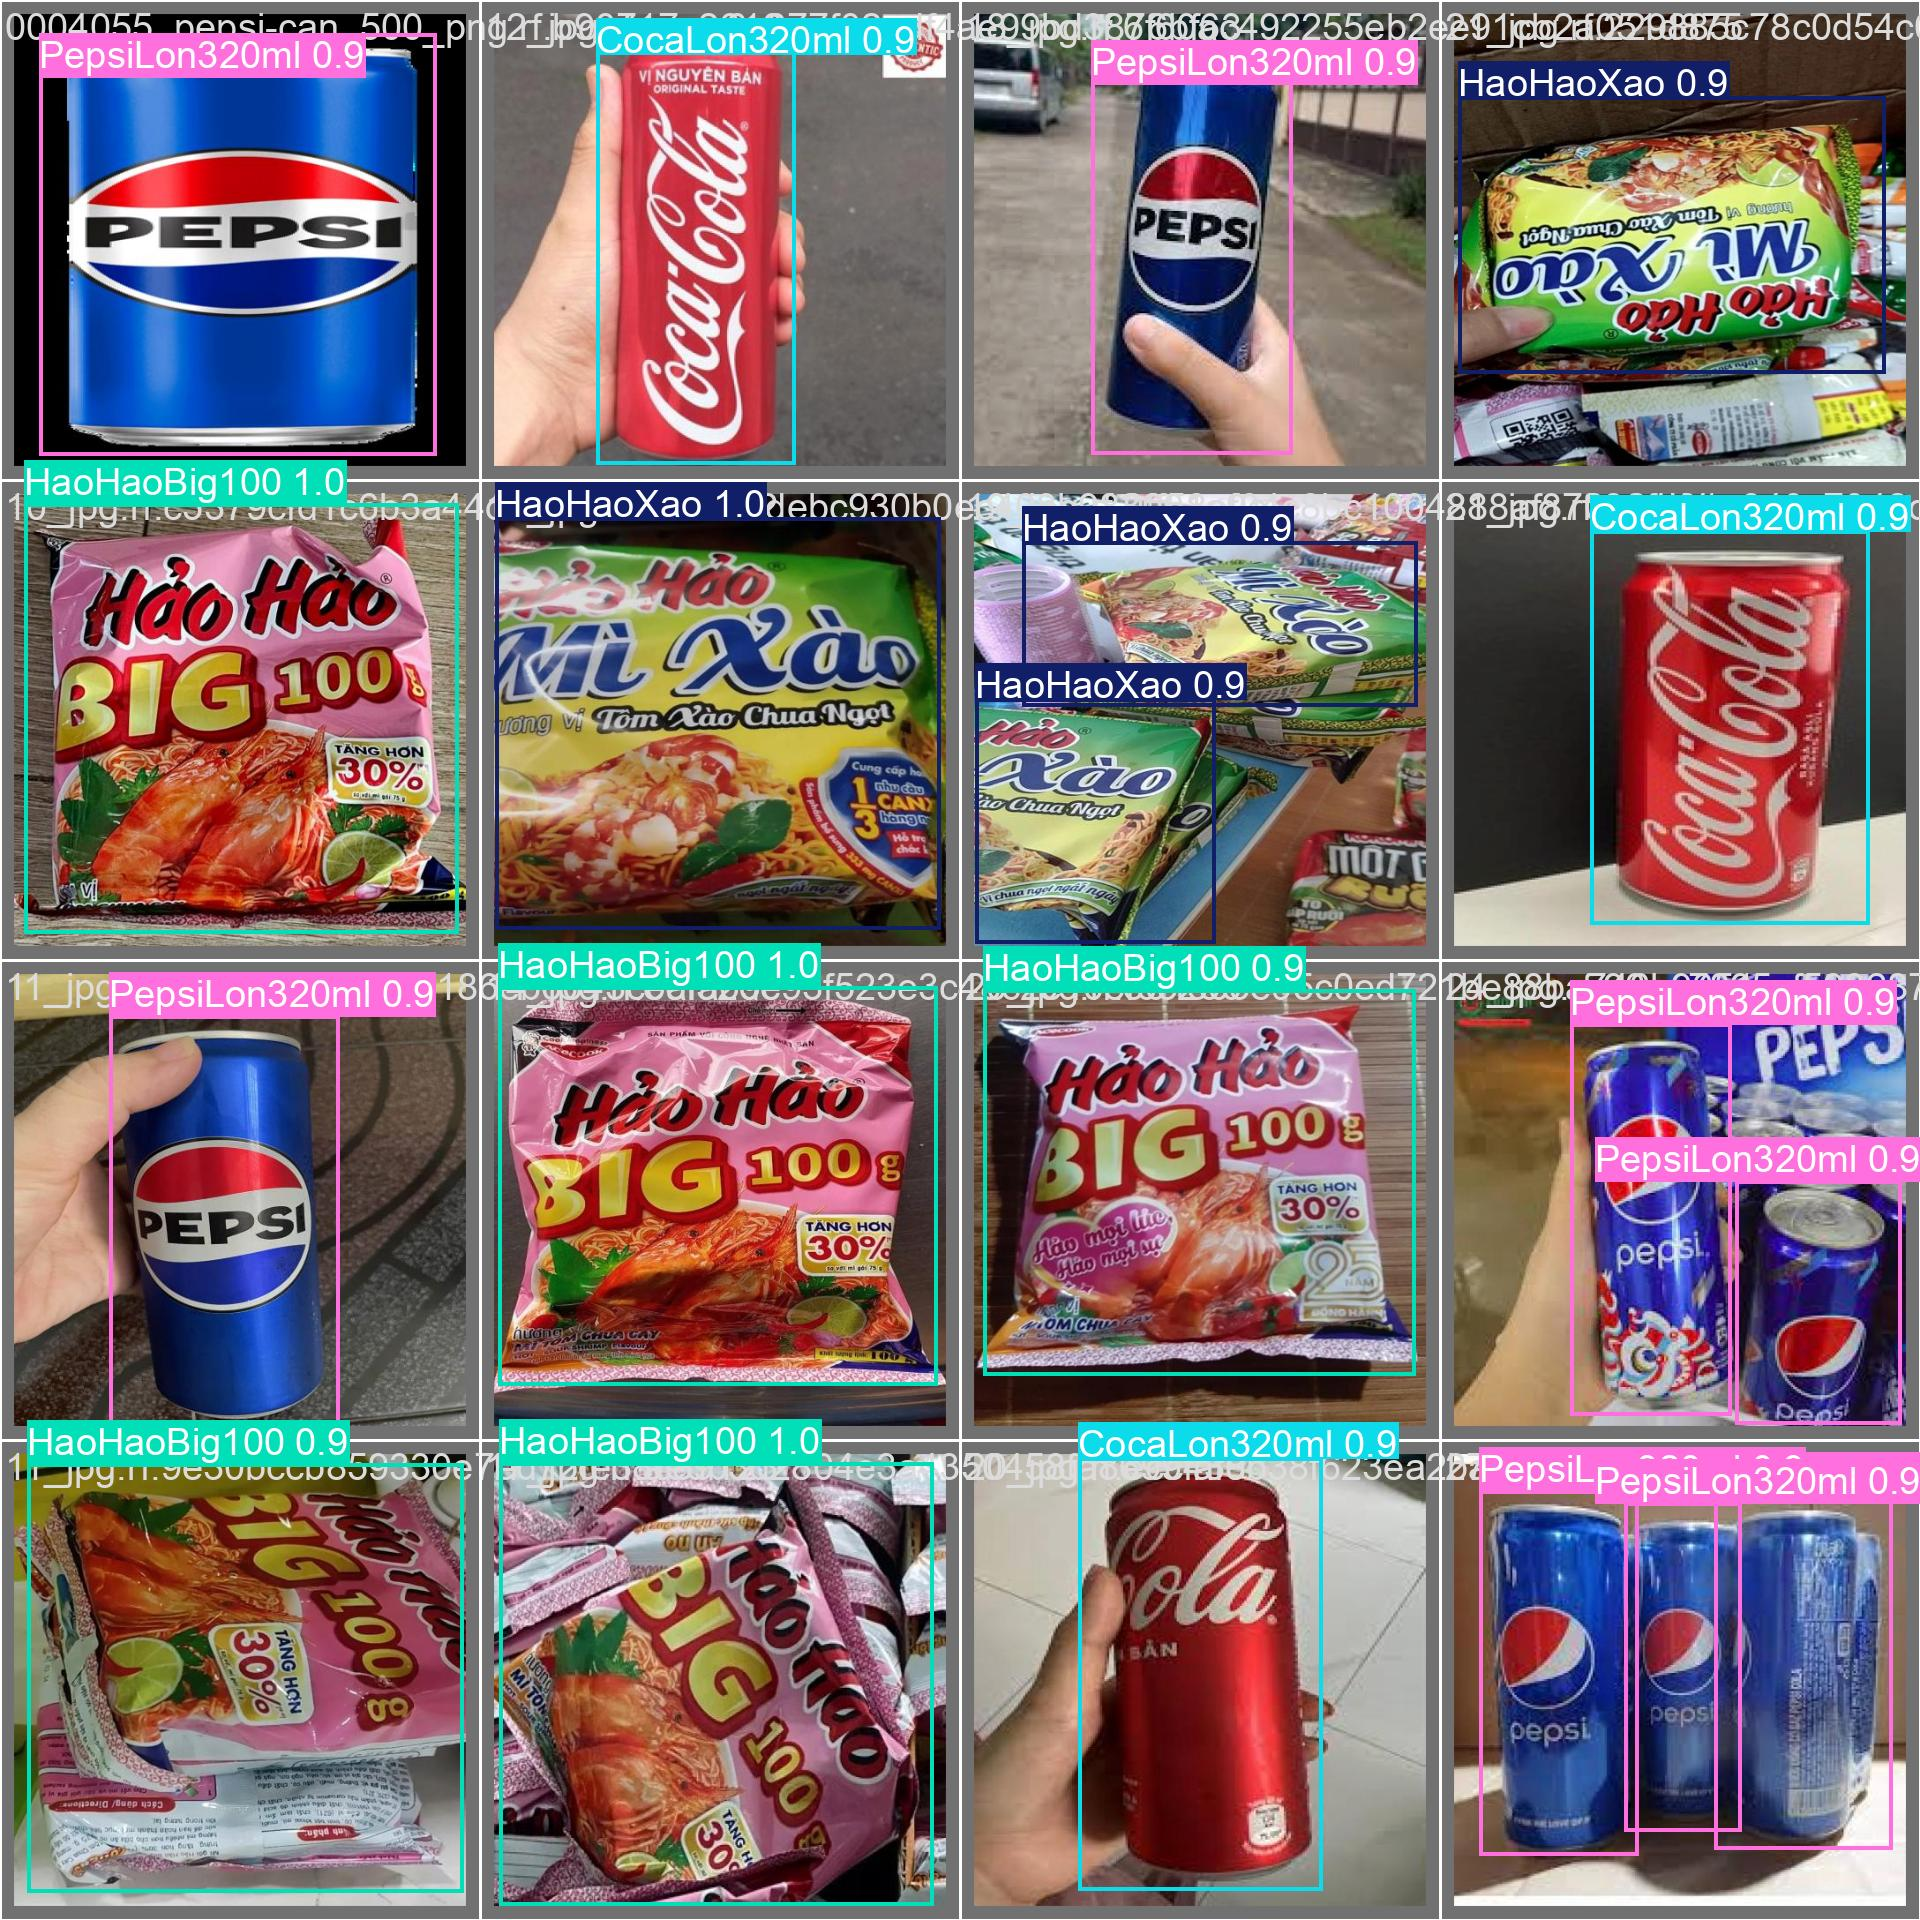

📌 Showing: val_batch1_labels.jpg


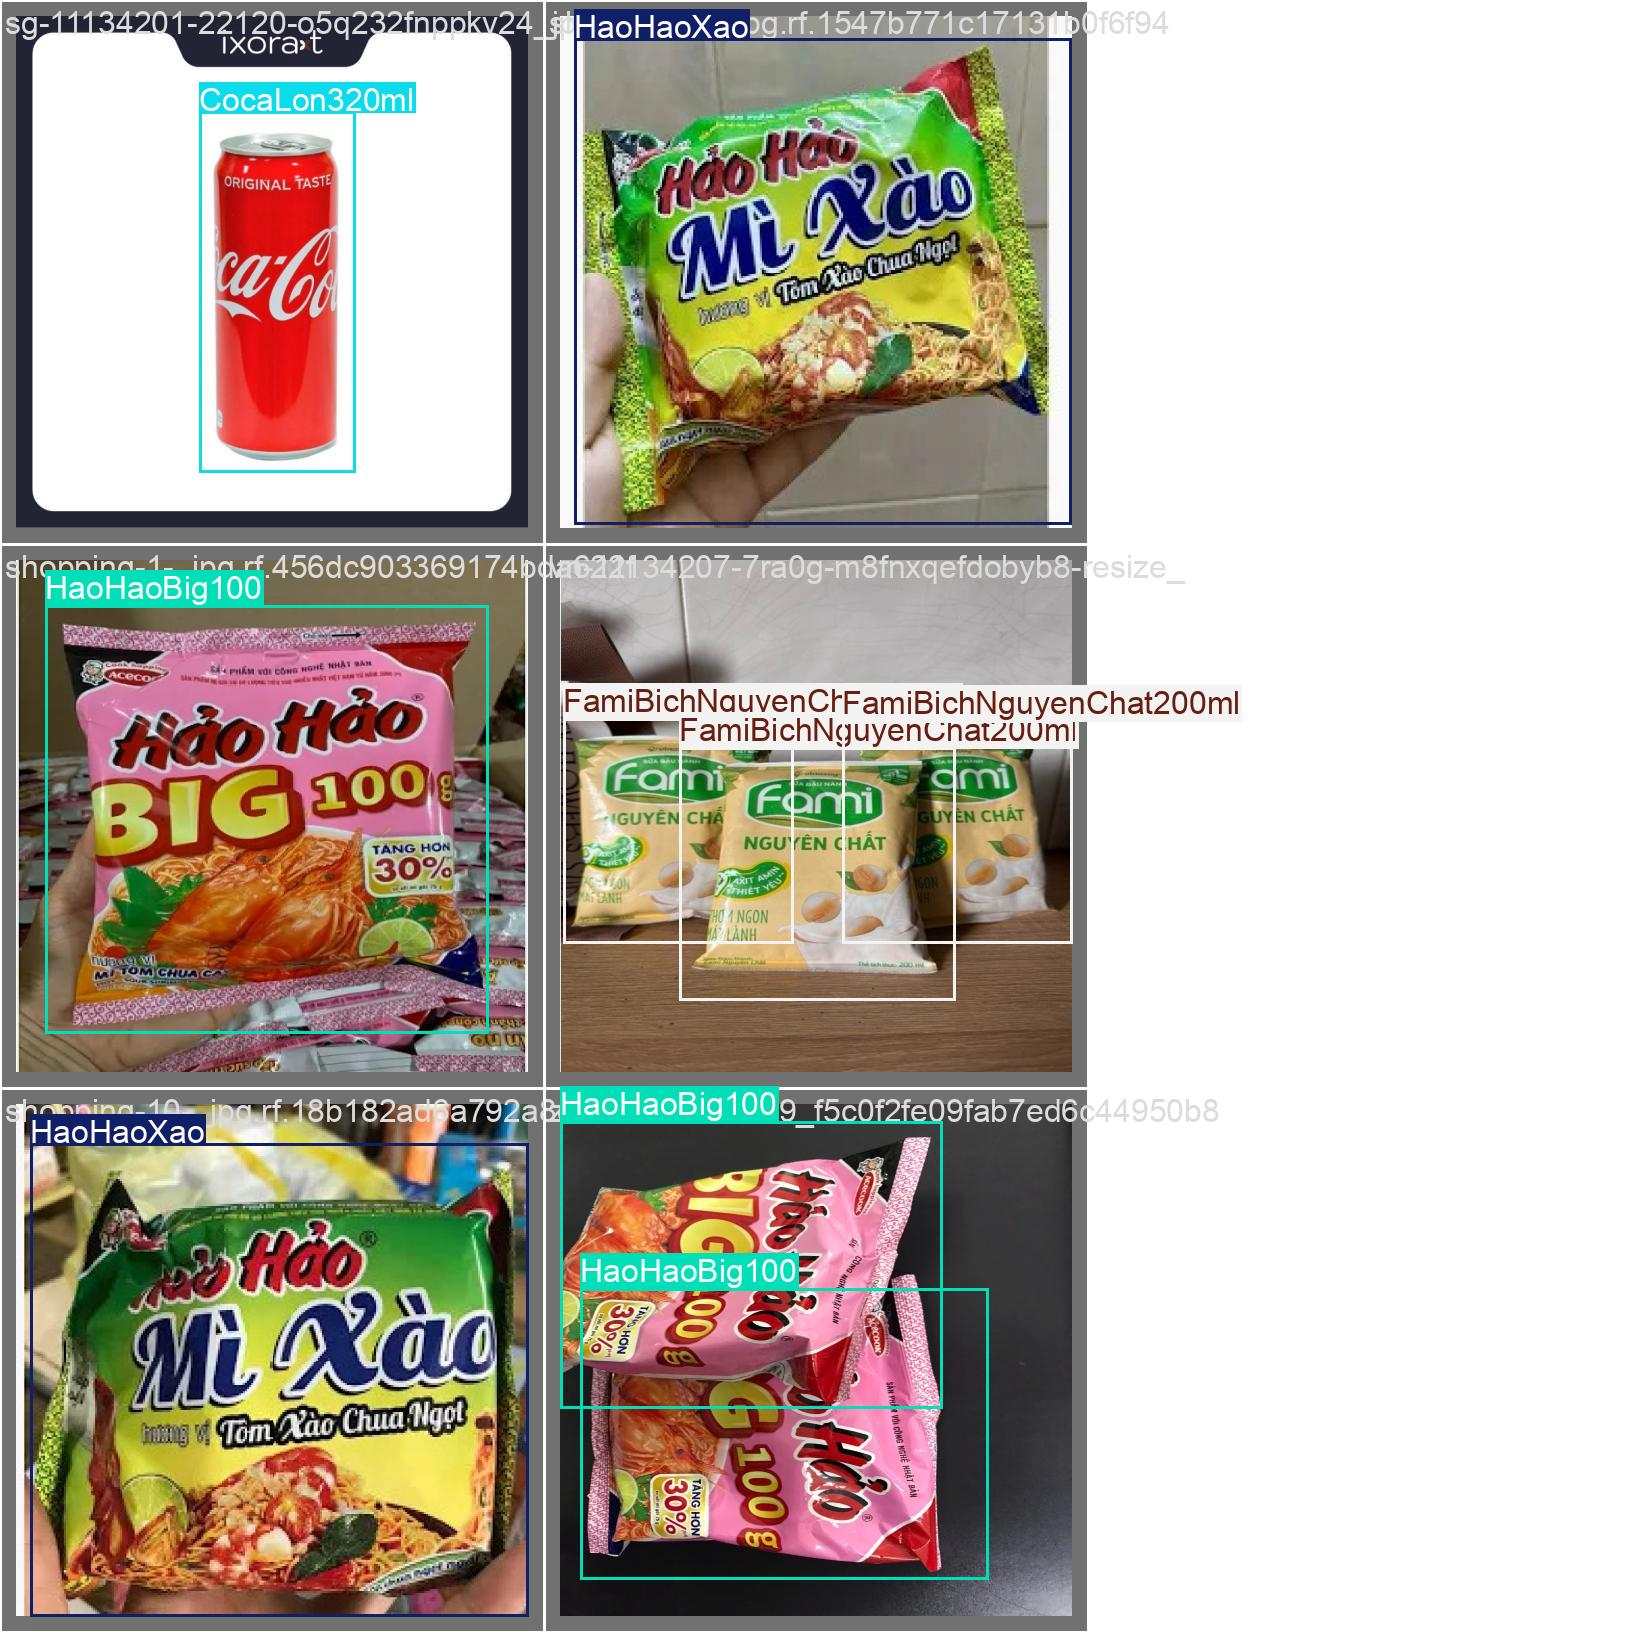

📌 Showing: val_batch1_pred.jpg


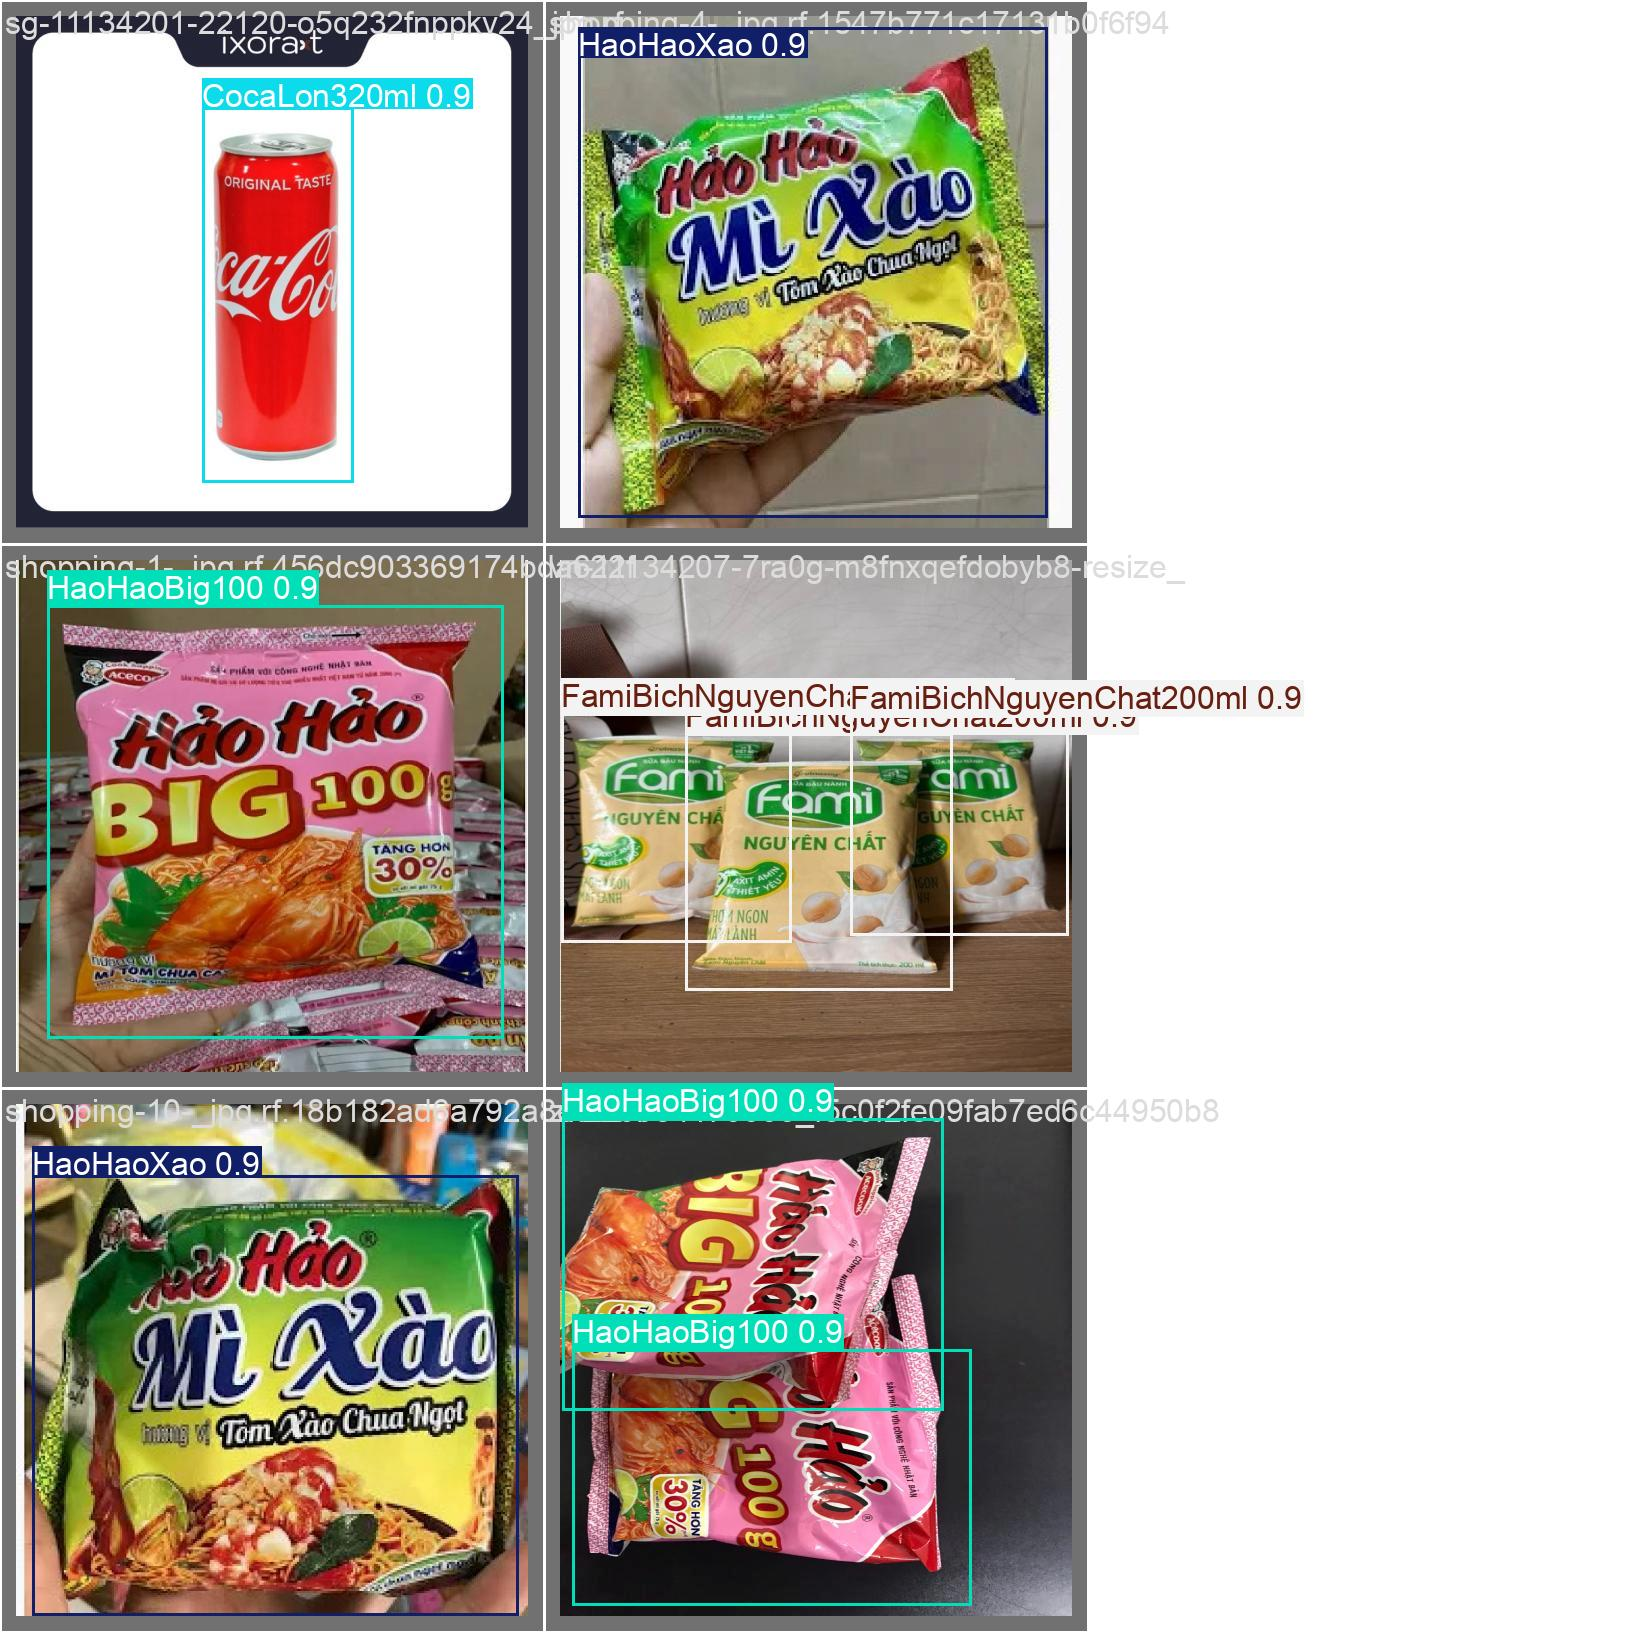

In [ ]:
import os
from IPython.display import Image, display

run_path = "/content/yolov8_hh_best/HaoHao_v33"

important_files = [
    "confusion_matrix.png",
    "confusion_matrix_normalized.png",
    "val_batch0_labels.jpg",
    "val_batch0_pred.jpg",
    "val_batch1_labels.jpg",
    "val_batch1_pred.jpg",
]

for file in important_files:
    full_path = os.path.join(run_path, file)
    if os.path.exists(full_path):
        print(f"📌 Showing: {file}")
        display(Image(filename=full_path))
    else:
        print(f"⚠️ File not found: {file}")


In [ ]:
import shutil
import os

# Đường dẫn file YOLOv8 weights sau khi train
best_model_path = "/content/yolov8_hh_best/HaoHao_v33/weights/best.pt"
last_model_path = "/content/yolov8_hh_best/HaoHao_v33/weights/last.pt"

# Thư mục lưu trên Google Drive
drive_folder = "/content/drive/MyDrive/YOLO_Models/HaoHaov33"
os.makedirs(drive_folder, exist_ok=True)

# Copy file .pt lên Drive
if os.path.exists(best_model_path):
    shutil.copy(best_model_path, drive_folder)
if os.path.exists(last_model_path):
    shutil.copy(last_model_path, drive_folder)

print(f"✅ Model .pt đã được lưu vào: {drive_folder}")

✅ Model .pt đã được lưu vào: /content/drive/MyDrive/YOLO_Models/HaoHaov33


📸 Found 7 images to evaluate.

🔍 Predicting: gtdd.jpg

image 1/1 /content/drive/My Drive/Project/testmymodel/gtdd.jpg: 352x512 1 HaoHaoXao, 13.4ms
Speed: 8.2ms preprocess, 13.4ms inference, 1.8ms postprocess per image at shape (1, 3, 352, 512)


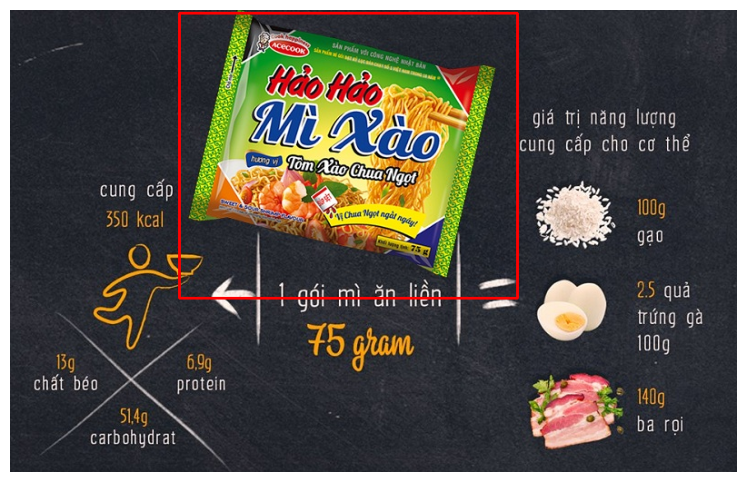

🔍 Predicting: images (1).jpg

image 1/1 /content/drive/My Drive/Project/testmymodel/images (1).jpg: 512x512 1 HaoHaoXao, 12.7ms
Speed: 2.6ms preprocess, 12.7ms inference, 1.6ms postprocess per image at shape (1, 3, 512, 512)


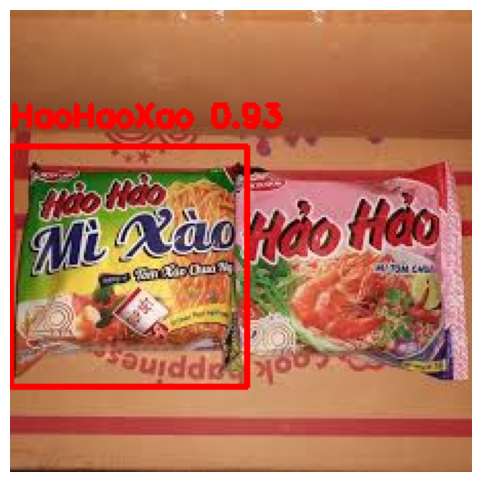

🔍 Predicting: images (2).jpg

image 1/1 /content/drive/My Drive/Project/testmymodel/images (2).jpg: 512x416 1 HaoHaoBig100, 13.4ms
Speed: 3.8ms preprocess, 13.4ms inference, 1.6ms postprocess per image at shape (1, 3, 512, 416)


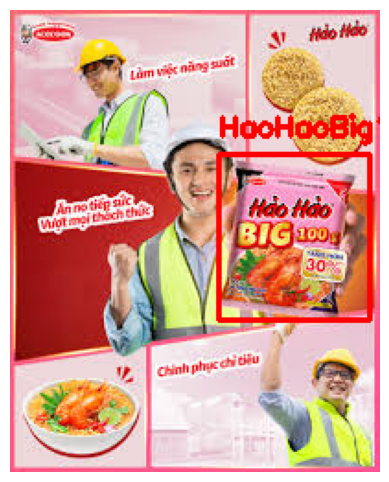

🔍 Predicting: images (3).jpg

image 1/1 /content/drive/My Drive/Project/testmymodel/images (3).jpg: 512x384 1 PepsiLon320ml, 11.7ms
Speed: 2.1ms preprocess, 11.7ms inference, 1.6ms postprocess per image at shape (1, 3, 512, 384)


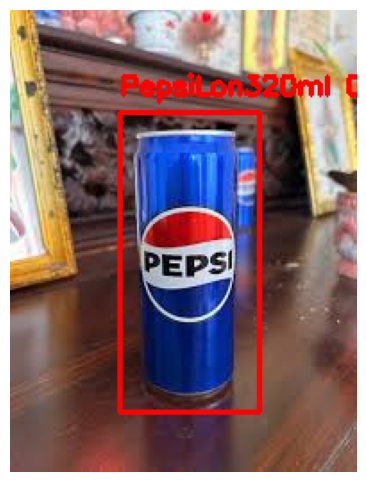

🔍 Predicting: images (4).jpg

image 1/1 /content/drive/My Drive/Project/testmymodel/images (4).jpg: 512x512 1 CocaLon320ml, 12.2ms
Speed: 2.7ms preprocess, 12.2ms inference, 1.6ms postprocess per image at shape (1, 3, 512, 512)


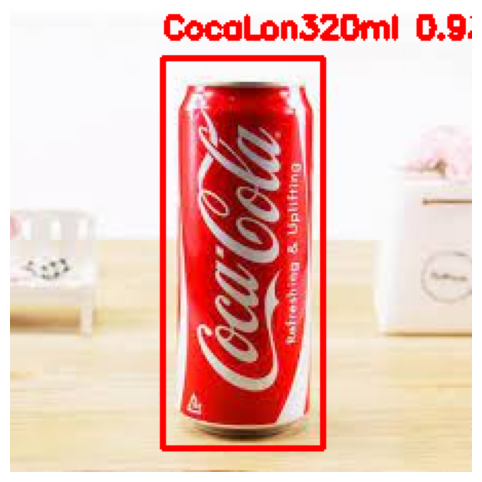

🔍 Predicting: images (5).jpg

image 1/1 /content/drive/My Drive/Project/testmymodel/images (5).jpg: 512x512 (no detections), 11.3ms
Speed: 2.7ms preprocess, 11.3ms inference, 0.8ms postprocess per image at shape (1, 3, 512, 512)


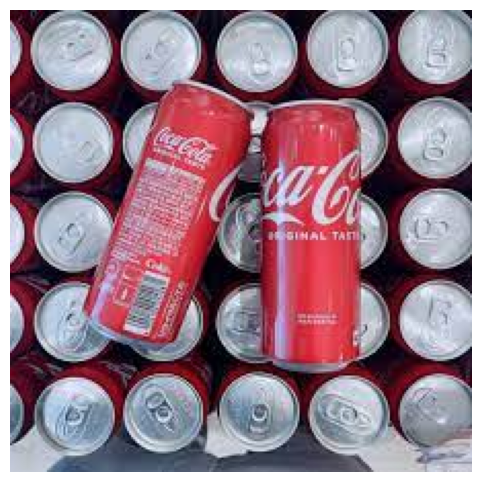

🔍 Predicting: images.jpg

image 1/1 /content/drive/My Drive/Project/testmymodel/images.jpg: 512x288 3 HaoHaoBig100s, 57.6ms
Speed: 6.9ms preprocess, 57.6ms inference, 6.2ms postprocess per image at shape (1, 3, 512, 288)


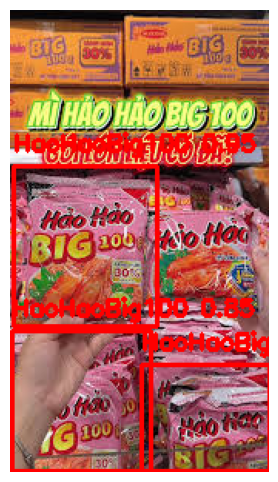

In [ ]:
from glob import glob
import os
import matplotlib.pyplot as plt
import cv2

# # # Load model đã train
# model_path = "/content/drive/MyDrive/YOLO_Models/HaoHaov33/best.pt"
# model = YOLO(model_path)

# Folder chứa ảnh test
test_dir = "/content/drive/My Drive/Project/testmymodel"

# Lấy danh sách tất cả ảnh trong folder
image_paths = sorted(
    glob(os.path.join(test_dir, "*.jpg")) +
    glob(os.path.join(test_dir, "*.jpeg")) +
    glob(os.path.join(test_dir, "*.png"))
)

print(f"📸 Found {len(image_paths)} images to evaluate.\n")

# Dự đoán và hiển thị ảnh cùng bounding box
for img_path in image_paths:
    print(f"🔍 Predicting: {os.path.basename(img_path)}")
    results = model.predict(source=img_path, conf=0.5, save=False)

    # Đọc ảnh bằng OpenCV
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # đổi sang RGB để matplotlib hiển thị đúng

    # Vẽ bounding box và label
    for r in results:
        boxes = r.boxes
        for box in boxes:
            x1, y1, x2, y2 = box.xyxy[0].tolist()
            cls_id = int(box.cls[0])
            conf = float(box.conf[0])
            cls_name = model.names[cls_id]

            # Vẽ rectangle
            cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), color=(255,0,0), thickness=2)

            # Viết label (class + conf)
            label = f"{cls_name} {conf:.2f}"
            cv2.putText(img, label, (int(x1), int(y1)-10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 2)

    # Hiển thị ảnh
    plt.figure(figsize=(10, 6))
    plt.imshow(img)
    plt.axis('off')
    plt.show()
